# I] Import functions and options

In [23]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [24]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [25]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [26]:
path = output_file_directory + "/dataframes_for_input/"

# II] Data download

In [27]:
%%time
# DL data ATG7 isoform expression
df = pandas.read_csv(path+'df_ATG7_transcripts.csv', sep = ',', index_col=0)
print(df.shape)
df.head()

(4310, 11)
Wall time: 19.9 ms


,Primary_Site,ATG7_1,ATG7_2,ATG7_3,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc
GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue,2.774154,1.572901,0.665603,5.840747,1.975023,0.586231,8.402002,69.516142,23.506581,6.977278
GTEX-1117F-0526-SM-5EGHJ,Blood Vessel,2.449581,2.125261,0.000000,4.462576,3.362819,0.000000,7.825395,57.026848,42.973152,0.000000
GTEX-1117F-0626-SM-5N9CS,Blood Vessel,3.147029,0.341564,0.000000,7.858296,0.267129,0.000000,8.125425,96.712428,3.287572,0.000000
GTEX-1117F-1326-SM-5EGHH,Adipose Tissue,1.676243,1.749657,0.000000,2.195947,2.362787,0.000000,4.558734,48.170106,51.829894,0.000000
GTEX-1117F-2226-SM-5N9CH,Ovary,2.923147,0.000000,0.000000,6.584989,0.000000,0.000000,6.584989,100.000000,0.000000,0.000000


# III] ATG7 expression per tissues

In [28]:
path2 = output_file_directory + 'ATG7/TCGA_GTEX/all_tissues/figs_ATG7_characterisation/'

## A) Expression of each isoform in TPM in all tissues

In [29]:
df_tissues = df[['Primary_Site','ATG7_1tpm','ATG7_2tpm']]

##Column rename
df_tissues = df_tissues.rename(columns = {'Primary_Site' : 'Primary Site', 
                                          'ATG7_1tpm': 'tpm ATG7(1)',
                                          'ATG7_2tpm': 'tpm ATG7(2)'})
df_tissues = df_tissues.sort_values('Primary Site')
df_tissues.head(2)

,Primary Site,tpm ATG7(1),tpm ATG7(2)
GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue,5.840747,1.975023
GTEX-13X6K-0726-SM-5LU2Z,Adipose Tissue,5.801200,0.682494


In [79]:
tissue_list = []
iso1_mean_list = []
iso2_mean_list = []

for tissue in tissues:
    tissue_list.append(tissue)
    means_ = df_tissues[df_tissues['Primary Site'] == tissue].mean(numeric_only=True)  
    iso1_mean_list.append(means_[0])
    iso2_mean_list.append(means_[1])
    
dicc = dict(tissue = tissue_list, ATG7_1tpm = iso1_mean_list, ATG7_2tpm = iso2_mean_list)
df_tissue_means = pandas.DataFrame.from_dict(dicc, orient='columns')          
df_tissue_means

,tissue,ATG7_1tpm,ATG7_2tpm
0,Esophagus,6.075548,1.107488
1,Testis,8.813845,3.609923
2,Adrenal Gland,6.766595,1.414049
3,Spleen,8.306949,0.835503
4,Ovary,7.361593,0.297131
5,Stomach,5.358256,0.675960
6,Skin,7.736198,3.361369
7,Salivary Gland,5.686618,1.793336
8,Blood,2.989723,4.459705
9,Lung,7.623714,2.040305


In [80]:
# Find min and max
## Iso1
min_iso1 = round(df_tissue_means['ATG7_1tpm'].min())
max_iso1 = round(df_tissue_means['ATG7_1tpm'].max())
## Iso2
min_iso2 = round(df_tissue_means['ATG7_2tpm'].min())
max_iso2 = round(df_tissue_means['ATG7_2tpm'].max())

print(f'For ATG7(1), min is {min_iso1}, max is {max_iso1}')
print(f'For ATG7(2), min is {min_iso2}, max is {max_iso2}')

For ATG7(1), min is 3, max is 11
For ATG7(2), min is 0, max is 4


In [94]:
#to find the lowest or highest expression mean
a = df_tissue_means['ATG7_1tpm'].min()
aa = df_tissue_means[df_tissue_means['ATG7_1tpm'] == a]
aa['tissue']

8    Blood
Name: tissue, dtype: object

tpm ATG7(1)


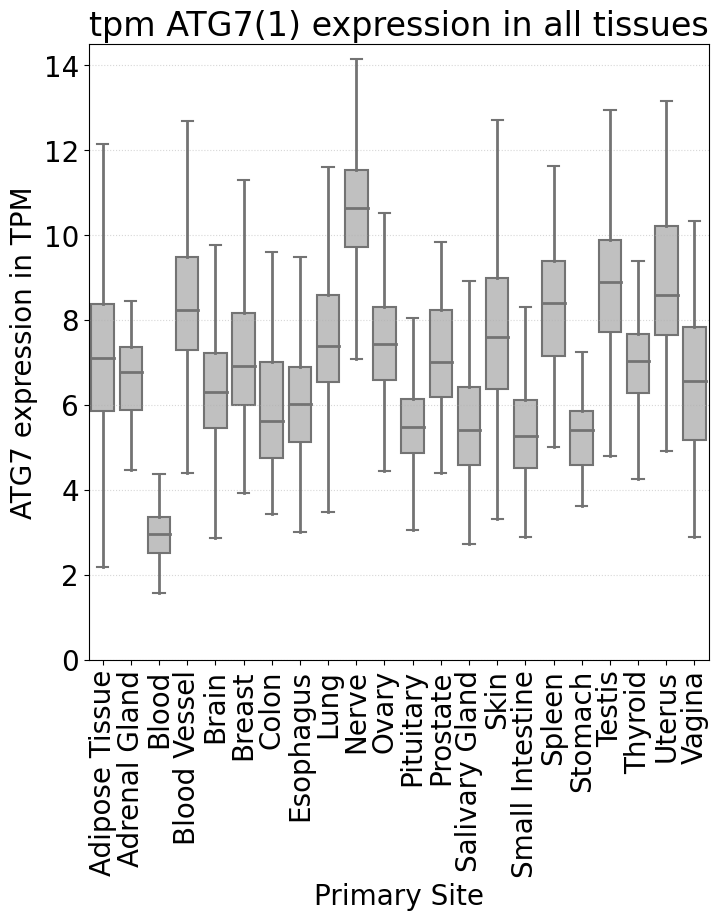

tpm ATG7(2)


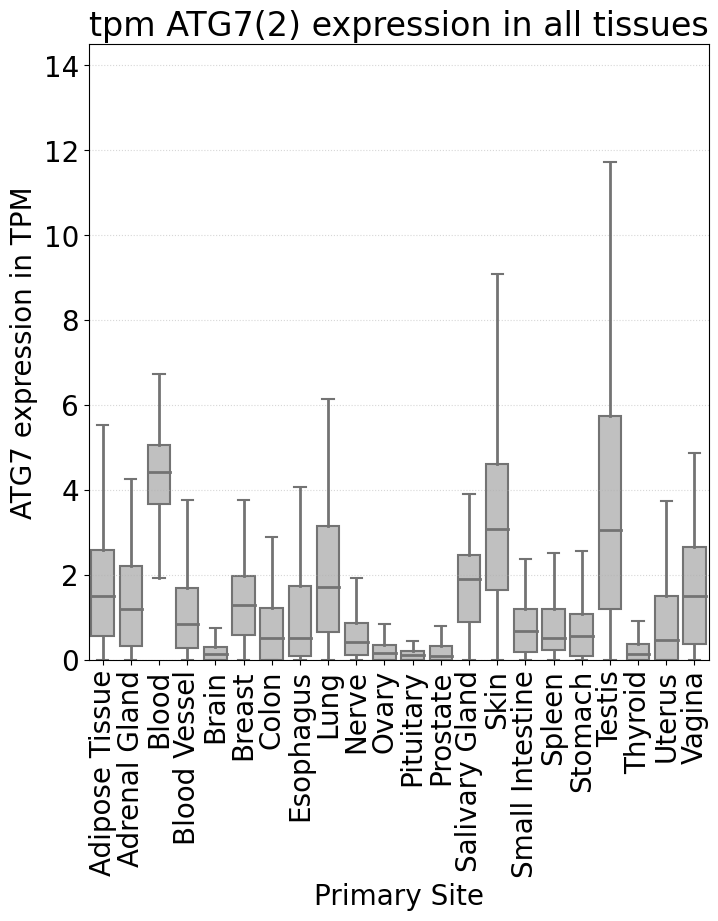

In [51]:
isoforms = 'tpm ATG7(1)', 'tpm ATG7(2)'
color_ = 'silver'
tissues_L = list(set(df_tissues['Primary Site']))

for isoform in isoforms:
    print(isoform)
    
    plt.figure(figsize=(8, 8))
    plt.tight_layout()
    
    seaborn.boxplot(data = df_tissues, y =  isoform, x = 'Primary Site', 
                    medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False,
                    color = color_)

    plt.title(isoform +' expression in all tissues')
    plt.ylabel('ATG7 expression in TPM')
    plt.ylim(0,14.5)
    plt.xticks(rotation = 90)
    
    name = 'boxplot_organs_' + isoform
    plt.savefig(path2+name+'_article.svg')
    
    plt.show()
    plt.close()

## B) Percentage of expression for each ATG7 isoform 

In [34]:
#heatmap data preparation
##select columns
df_sampletype = df[['Primary_Site','ATG7_1tpm','ATG7_2tpm',
                    'ATG7_1perc','ATG7_2perc','ATG7_3perc']]

##Column rename
df_sampletype = df_sampletype.rename(columns = {'Primary_Site' : 'Primary Site', 
                                                'ATG7_1tpm': 'tpm ATG7(1)',
                                                'ATG7_2tpm': 'tpm ATG7(2)',
                                                'ATG7_1perc' : "% ATG7(1)",
                                                'ATG7_2perc' : "% ATG7(2)",
                                                'ATG7_3perc' : "% ATG7(3)"})

##Groupby to have merge of all the primary site 
df_sampletype= df_sampletype.groupby('Primary Site').agg(numpy.mean)
df_sampletype = df_sampletype.round(2)

df_sampletype.head()

,tpm ATG7(1),tpm ATG7(2),% ATG7(1),% ATG7(2),% ATG7(3)
Primary Site,,,,,
Adipose Tissue,7.06,1.73,79.62,18.39,1.99
Adrenal Gland,6.77,1.41,82.92,15.55,1.52
Blood,2.99,4.46,37.31,54.50,8.19
Blood Vessel,8.39,1.14,87.16,11.54,1.30
Brain,6.57,0.34,95.02,4.09,0.90


In [35]:
#nearest int to try to have 100% final...
df_sampletype['total%'] = df_sampletype['% ATG7(1)'] + df_sampletype['% ATG7(2)'] + df_sampletype['% ATG7(3)']
df_sampletype

,tpm ATG7(1),tpm ATG7(2),% ATG7(1),% ATG7(2),% ATG7(3),total%
Primary Site,,,,,,
Adipose Tissue,7.06,1.73,79.62,18.39,1.99,100.00
Adrenal Gland,6.77,1.41,82.92,15.55,1.52,99.99
Blood,2.99,4.46,37.31,54.50,8.19,100.00
Blood Vessel,8.39,1.14,87.16,11.54,1.30,100.00
Brain,6.57,0.34,95.02,4.09,0.90,100.01
Breast,7.09,1.36,82.75,15.59,1.66,100.00
Colon,5.92,0.79,87.42,11.38,1.20,100.00
Esophagus,6.08,1.11,85.08,13.70,1.22,100.00
Lung,7.62,2.04,78.29,19.15,2.56,100.00


In [96]:
print(df_sampletype['% ATG7(1)'].mean())
print(df_sampletype['% ATG7(2)'].mean())

83.66227272727274
14.517272727272728


In [36]:
HeatMap_df_sampletype = df_sampletype[['% ATG7(1)', '% ATG7(2)', '% ATG7(3)']]

### 1. For all tissues

In [37]:
# From wide to long dataframe
df_perc_all = HeatMap_df_sampletype.melt()
df_perc_all['variable'] = df_perc_all['variable'].str.split(' ', expand=True)[1]
df_perc_all

,variable,value
0,ATG7(1),79.62
1,ATG7(1),82.92
2,ATG7(1),37.31
3,ATG7(1),87.16
4,ATG7(1),95.02
...,...,...
61,ATG7(3),0.87
62,ATG7(3),4.03
63,ATG7(3),0.68
64,ATG7(3),1.49


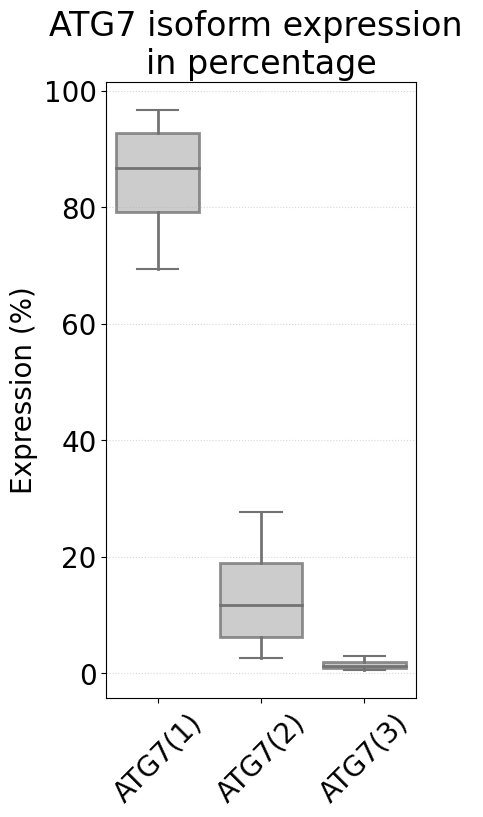

In [38]:
#graph
plt.figure(figsize=(4, 8))
seaborn.boxplot(x="variable", y="value", color = 'silver',
                data = df_perc_all, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False)

plt.title('ATG7 isoform expression \nin percentage')
plt.ylabel('Expression (%)')
plt.xlabel('')
plt.xticks(rotation = 45)
#save
name = 'boxplot_percentage'
plt.savefig(path2+name+'_article.svg')

### 2. For each tissue

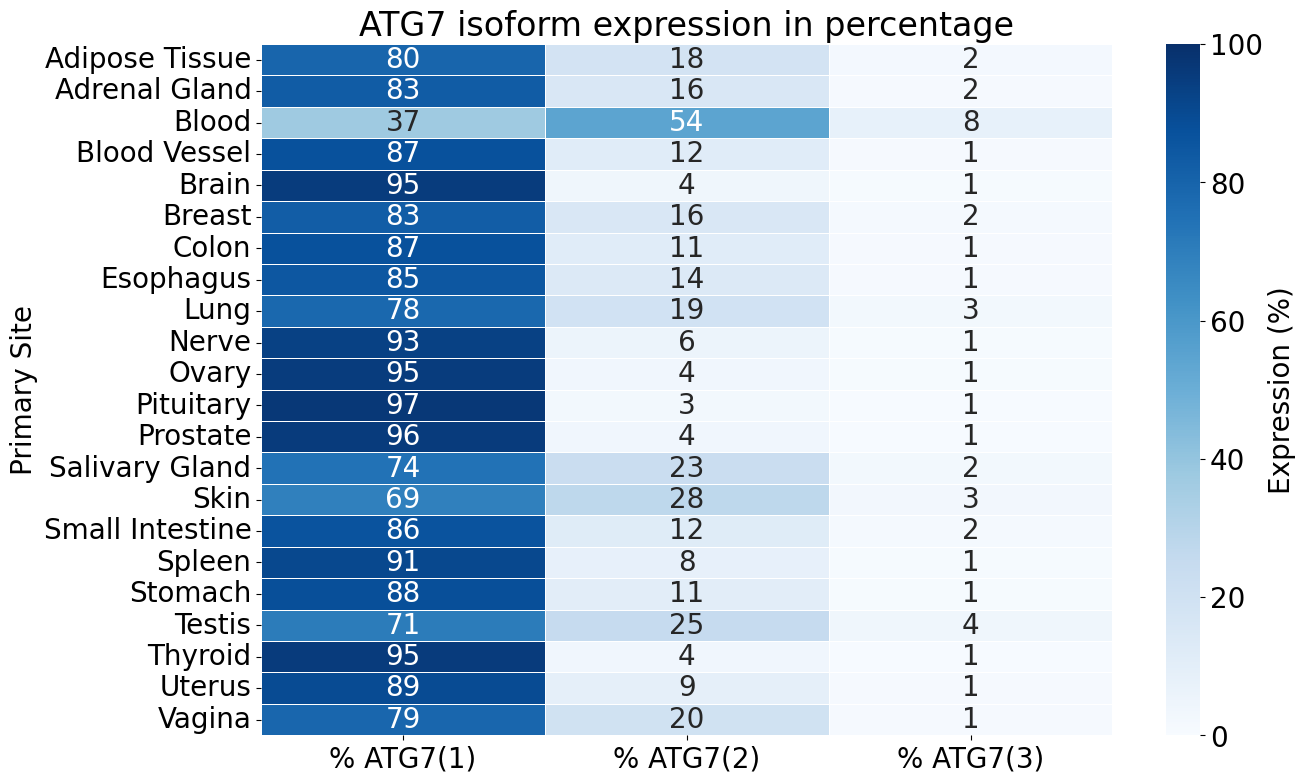

In [40]:
#heatmap percentage
plt.subplots()
plt.tight_layout()

seaborn.heatmap(HeatMap_df_sampletype, annot=True, cmap="Blues", linewidths=.5,
                vmin = 0, vmax = 100,
                xticklabels=True, yticklabels=True, fmt='.0f',
                cbar_kws={'label': 'Expression (%)'})
plt.title('ATG7 isoform expression in percentage')

name = 'heatmap_organs_article'
plt.savefig(path2+name+'_article.svg')

## C. ATG7(1) and ATG7(2) difference in expression for all tissues

                  FC_ATG7         Pvalue
tissue                                  
Blood            0.453221   2.816811e-15
Skin            -1.075059  8.419680e-133
Salivary Gland  -1.147359   6.832297e-15
Testis          -1.288050   1.119212e-42
Vagina          -1.599249   1.227986e-25
Lung            -1.625758   2.795396e-86
Adipose Tissue  -1.695710  6.156863e-133
Breast          -1.795243   1.343732e-53
Adrenal Gland   -1.832373   1.538497e-18
Small Intestine -1.908668   1.882061e-26
Stomach         -2.033782   1.711107e-19
Colon           -2.122031   1.575642e-74
Esophagus       -2.212645  1.647829e-128
Blood Vessel    -2.319091  1.713125e-163
Pituitary       -2.532948   9.649337e-36
Spleen          -2.627792   2.290499e-31
Brain           -2.692298   4.810459e-86
Uterus          -2.715325   6.985638e-25
Thyroid         -2.809505   1.616175e-86
Ovary           -2.851557   7.820974e-30
Prostate        -2.863204   1.621823e-32
Nerve           -3.040689   1.982904e-86


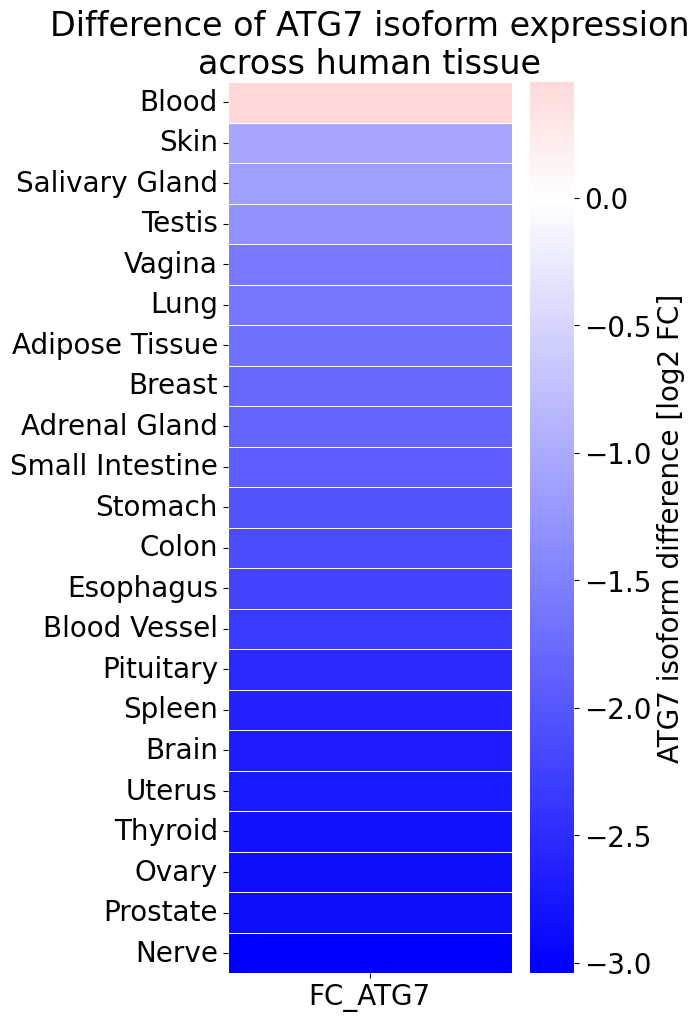

In [41]:
# Calculate fold change + Heatmap (of the LOG2(TPM+1) expression)
tissues = set( list(df["Primary_Site"]) )
tissue_l = []

isoforms = 'ATG7_1', 'ATG7_2'

foldchange_l = []
pvalue_l = []

for tissue in tissues:
    tissue_l.append(tissue)
    
    df_tissue = df[df['Primary_Site'] == tissue]
    #calculate FoldChange (primary / normal)
    fc = df_tissue['ATG7_2'].median() - df_tissue['ATG7_1'].median()
    foldchange_l.append(fc)
    #stats
    statistic, pvalue = scipy.stats.mannwhitneyu(df_tissue['ATG7_2'], df_tissue['ATG7_1'])
    pvalue_l.append(pvalue)
    
#save in dict, then to df
d = dict(tissue = tissue_l, FC_ATG7 = foldchange_l, Pvalue = pvalue_l)
df_ATG7_diff_tissues = pandas.DataFrame.from_dict(d, orient='columns')
df_ATG7_diff_tissues = df_ATG7_diff_tissues.sort_values('FC_ATG7', ascending=False)
# and reset_index
df_ATG7_diff_tissues.set_index('tissue',inplace = True, drop = True)
print(df_ATG7_diff_tissues)

#Heatmap correlation
HeatMap_df = df_ATG7_diff_tissues[['FC_ATG7']].astype(float)

plt.subplots(figsize=(5,10))
plt.tight_layout()
seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, center=0,
               cbar_kws={'label': 'ATG7 isoform difference [log2 FC]'})
plt.ylabel('')
plt.title('Difference of ATG7 isoform expression\nacross human tissue')

title_file = 'Heatmap_difference_expression'
plt.savefig(path2+title_file+'.svg')

## D. ATG7 isoform correlation

### 1. For all tissue

In [44]:
#Remove the 0.5% extremities to have a nicer graph
isoforms = 'ATG7_1', 'ATG7_2'

#Remove 0.5% extremities
df_no_extrem = []
for isoform in isoforms:
    #sort by value, 
    for_isoforms = df.sort_values([isoform], ascending = False)
    print(isoform)

    #remove the extremities
    lenght = len(for_isoforms)
    without_05perc = int(lenght*0.005)
    print('', without_05perc, 'are removed from head and tail')
    without_head = without_05perc
    without_tail = lenght - without_05perc

    df_no_extremities = for_isoforms.iloc[without_head:without_tail,:]
    print(' without extremities:', df_no_extremities.shape)
    print()
    df_no_extrem.append(df_no_extremities)
        
#drop the unfiltered column ATG7_2 ([0]) and replace it with the filtered one ([1]) 
df_no_extrem[0].pop("ATG7_2")
#add column ATG7_2 (filtered one) at the correct position
df_no_extrem[0].insert(5, "ATG7_2", df_no_extrem[1]['ATG7_2'])
#remove NaN (the deleted samples for the two isoform)
df_final = df_no_extrem[0].dropna(axis=0)

print('df_final after merge of the two filtered columns:', df_final.shape)
print('________________________')

ATG7_1
 21 are removed from head and tail
 without extremities: (4268, 11)

ATG7_2
 21 are removed from head and tail
 without extremities: (4268, 11)

df_final after merge of the two filtered columns: (4226, 11)
________________________


The correlation between iso1 and iso2 is: -0.08229679225966456, 8.441350993521103e-08


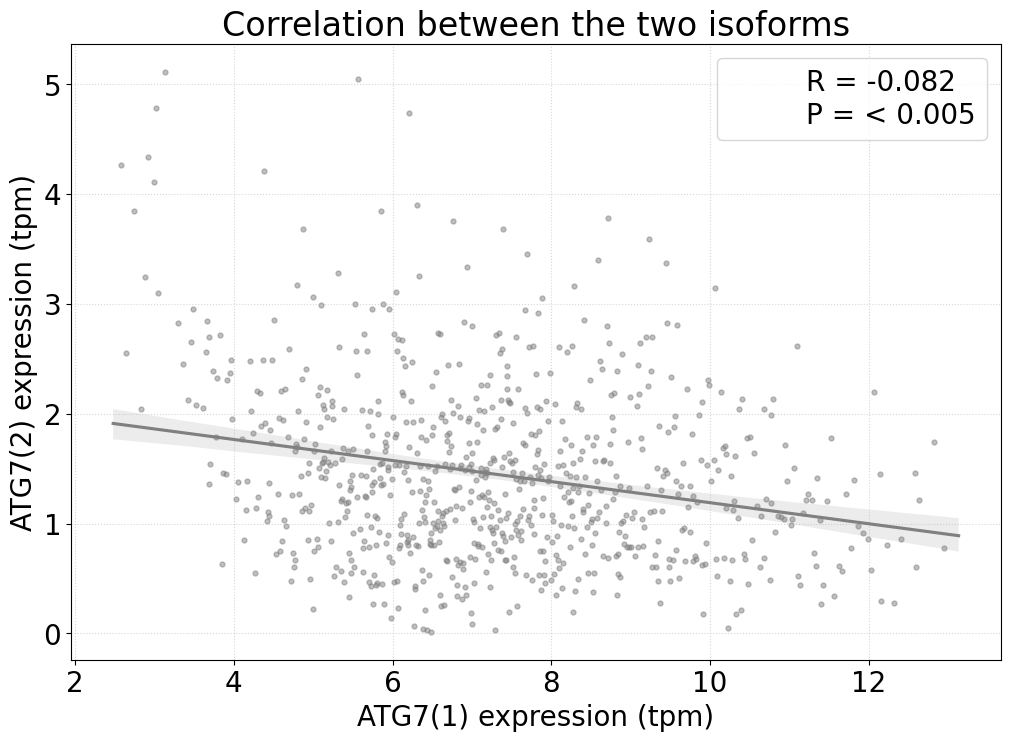

In [47]:
#Graph and stats_ spearman correlation
pvalue_text = '< 0.005'

x = df_final['ATG7_1tpm'].to_list()
y = df_final['ATG7_2tpm'].to_list()    

#stat Spearman correlation 
r_value, p_value = scipy.stats.spearmanr(x, y)
print(f'The correlation between iso1 and iso2 is: {r_value}, {p_value}')

#graph
plt.figure(figsize=(12, 8))
seaborn.regplot(x=x,y=y, x_bins=800, x_ci = 0, marker=".",
                scatter_kws={"color": "grey", "alpha": 0.5}, line_kws={"color": "grey"})

seaborn.regplot(x=[],y=[], marker=" ", 
                label= f'R = {str(round(r_value,3))} \nP = {str(pvalue_text)}')

plt.title(f'Correlation between the two isoforms')
plt.xlabel("ATG7(1) expression (tpm)")
plt.ylabel('ATG7(2) expression (tpm)')

plt.grid(ls = ":", alpha=0.5)
plt.legend()

#save
title_file = 'ATG7s_corr_tpm_article'
plt.savefig(path2+title_file+'_article.svg')

plt.show()  
print()

### 2. For each tissue

In [48]:
#stats_ spearman correlation
#graph
tissue_l = []
r_value_l = []
p_value_l = []

tissues = set( list(df["Primary_Site"]) )
for tissue in tissues:  

#     print(tissue)
    df_tissue = df[df['Primary_Site'] == tissue]  
    
    x = df_tissue['ATG7_1tpm'].to_list()
    y = df_tissue['ATG7_2tpm'].to_list()    

    #stat Spearman correlation 
    r_value, p_value = scipy.stats.spearmanr(x, y)

    r_value_l.append(r_value)
    p_value_l.append(p_value)
    tissue_l.append(tissue)
           
#save in dict, then to df
d = dict(tissue = tissue_l, Corr_score = r_value_l, P_value = p_value_l)

#Transpose to have a better table
df_atg7_correlation_tissues = pandas.DataFrame.from_dict(d, orient='index')
df_atg7_correlation_tissues = df_atg7_correlation_tissues.transpose()

#keep minimum text in sample_type for later
df_atg7_correlation_tissues.head(4)

,tissue,Corr_score,P_value
0,Esophagus,-0.396659,0.0
1,Testis,-0.444521,0.0
2,Adrenal Gland,0.046464,0.743601
3,Spleen,0.075381,0.477606


In [49]:
#split the df based on the normal and primary
df_atg7_correlation_tissues.sort_values('Corr_score', inplace = True)
df_atg7_correlation_tissues.set_index('tissue', inplace = True)
df_atg7_correlation_tissues

,Corr_score,P_value
tissue,,
Vagina,-0.549316,0.0
Testis,-0.444521,0.0
Colon,-0.413021,0.0
Esophagus,-0.396659,0.0
Skin,-0.390621,0.0
Blood Vessel,-0.385034,0.0
Uterus,-0.345987,0.003122
Small Intestine,-0.325476,0.004118
Stomach,-0.294239,0.029218


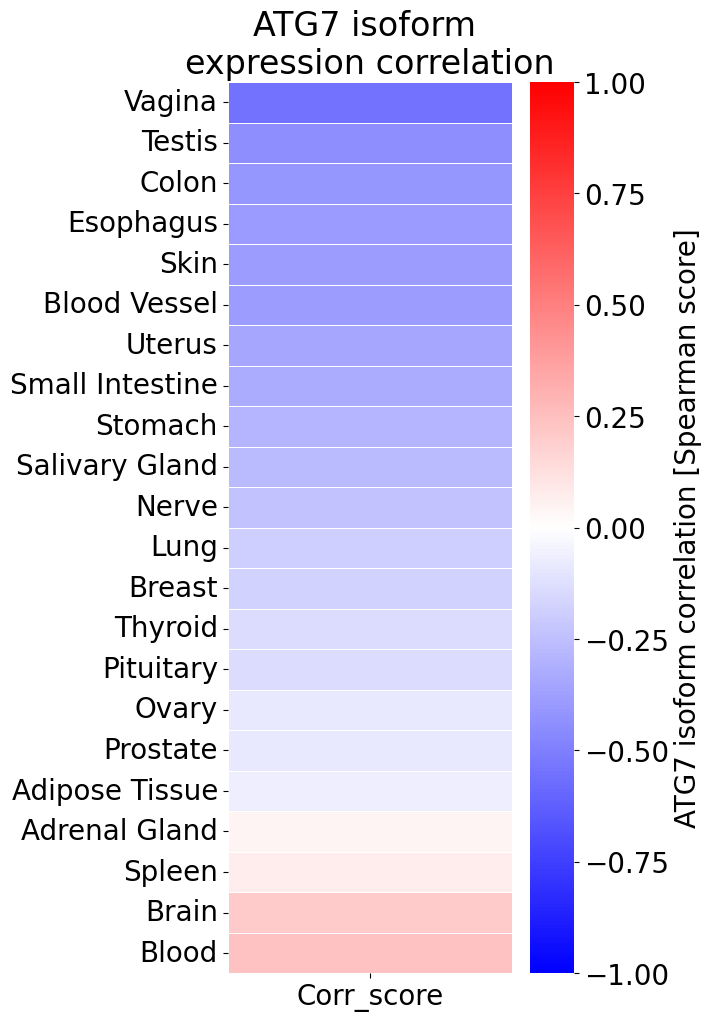

In [97]:
#Heatmap correlation
df_corr = df_atg7_correlation_tissues
HeatMap_df = df_corr[['Corr_score']].astype(float)

plt.subplots(figsize=(5,10))
plt.tight_layout()
seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, vmin = -1, vmax= 1,center=0,
               cbar_kws={'label': 'ATG7 isoform correlation [Spearman score]'})
plt.ylabel('')
plt.title('ATG7 isoform \nexpression correlation')

title_file = 'Heatmap_Correlation'
plt.savefig(path2+title_file+'.svg')